# Ames Housing Data and Kaggle Challange

## Part 1

### Importing Libararies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.stats as stats
import os as os
%matplotlib inline

In [2]:
# Created an output folder for model results
#os.mkdir('output') 

### Reading the data

In [3]:
df_train = pd.read_csv('C://Users/domin_lxdhy/Downloads/train.csv')

In [4]:
df_test = pd.read_csv('C://Users/domin_lxdhy/Downloads/test.csv')

## Data CLeaning:

In [5]:
df_train.shape

(2051, 81)

In [6]:
df_test.shape

(878, 80)

In [7]:
# Renaming all the columns

def dropcase(df):
    col_dict={}
    for i in df.columns:
        col_dict[i] = i.lower().replace(" ", "_")
    return df.rename(col_dict, axis="columns")

In [8]:
df_train = dropcase(df_train)

In [9]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
df_test = dropcase(df_test)

In [11]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Text(0.5, 0, 'Feature Columns')

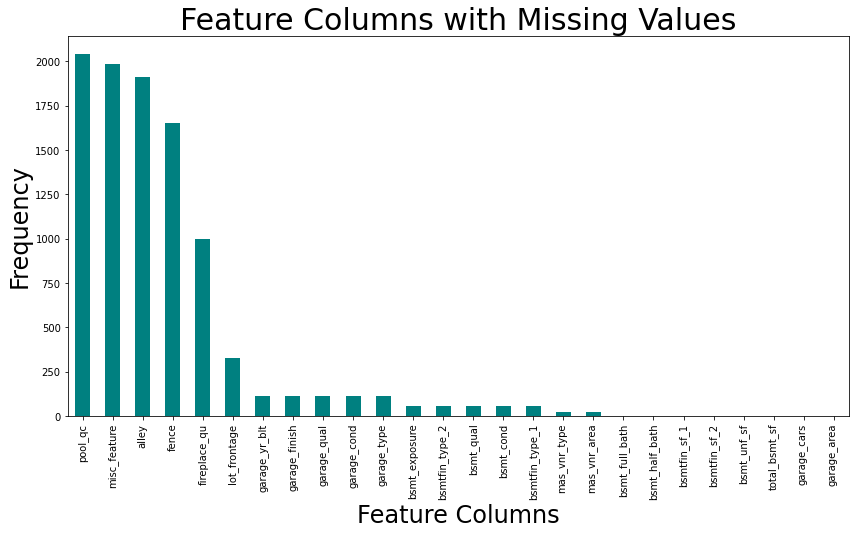

In [14]:
# Looking for Null values.

train_na = np.sum(df_train.isnull())
train_na[train_na > 0]

plt.figure(figsize=(14, 7))
bar_na = train_na.nlargest(26).plot(kind='bar', color = 'teal')
bar_na.set_ylabel('Frequency', fontsize=24)
bar_na.set_title("Feature Columns with Missing Values", fontsize=30)
bar_na.set_xlabel("Feature Columns", fontsize=24)


In [15]:
# Function for identifying the number of nulls in columns.

def null_values(df):
    for i in df:
        if df[i].dtype == 'O':
            if df[i].isnull().sum() > 0:
                print(df[i].value_counts())  
                print("Number of Nulls: " + str(df[i].isnull().sum()))
                print("Percentage of Nulls: " + str(np.round((df[i].isnull().sum() / 14.60), 2)) + "%")
                print("\n")

In [16]:
null_values(df_train)

Grvl    85
Pave    55
Name: alley, dtype: int64
Number of Nulls: 1911
Percentage of Nulls: 130.89%


None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
Number of Nulls: 22
Percentage of Nulls: 1.51%


TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64
Number of Nulls: 55
Percentage of Nulls: 3.77%


TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64
Number of Nulls: 55
Percentage of Nulls: 3.77%


No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64
Number of Nulls: 58
Percentage of Nulls: 3.97%


GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
Number of Nulls: 55
Percentage of Nulls: 3.77%


Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64
Number of Nulls: 56
Percentage of Nulls: 3.84%


Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: f

In [17]:
# Dropping columns with high quantity of nulls and low predictive quality 
df_train.drop(columns=['alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature'], inplace=True)

In [18]:
df_test.drop(columns=['alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature'], inplace=True)

In [19]:
# Identifying quality features and filling missing values wiht "None" if feature is not in the house

qual_col= ['bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'exter_qual', 'exter_cond',
            'garage_type', 'garage_finish','garage_cond', 'mas_vnr_type', 'bsmt_exposure', 'garage_qual']

In [20]:
def fill_nulls(features):
    for feature in features:
        df_train[feature].replace(to_replace = np.nan, value = 'None', inplace = True)
    return df_train

In [21]:
fill_nulls(qual_col)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,IR1,HLS,AllPub,...,276,0,0,0,0,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,Reg,Bnk,AllPub,...,0,0,0,0,0,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,...,189,140,0,0,0,0,11,2009,WD,144000


qual_col_= ['bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'exter_qual', 'exter_cond',
            'garage_type', 'garage_finish','garage_cond', 'mas_vnr_type', 'bsmt_exposure', 'garage_qual']

In [22]:
qual_col_2= ['bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'exter_qual', 'exter_cond',
            'garage_type', 'garage_finish','garage_cond', 'mas_vnr_type', 'bsmt_exposure', 'garage_qual']

In [23]:
def fill_null(features):
    for feature in features:
        df_test[feature].replace(to_replace = np.nan, value = 'None', inplace = True)
    return df_test

In [24]:
fill_null(qual_col_2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,0,76,0,0,185,0,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,Reg,Lvl,AllPub,...,0,96,0,0,0,0,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,Reg,Lvl,AllPub,...,0,230,0,0,0,0,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,Reg,Lvl,AllPub,...,0,63,0,0,0,0,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,5,2007,WD


In [25]:
# Changing binary variables from strings to numericals
df_train["central_air"] = df_train["central_air"].map({"Y":1, "N":0})
df_train["paved_drive"] = df_train["paved_drive"].map({"Y":1, "N":0, "P":1})

In [26]:
df_test["central_air"] = df_test["central_air"].map({"Y":1, "N":0})
df_test["paved_drive"] = df_test["paved_drive"].map({"Y":1, "N":0, "P":1})

In [27]:
df_train.fillna(df_train.mean(), inplace=True)

In [28]:
df_test.fillna(df_test.mean(), inplace=True)

In [29]:
# Changing qualitive columns into numeric values

map_dict = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "None":0}
qual_cols = ["exter_qual", "exter_cond", "bsmt_qual", "bsmt_cond", "kitchenqual", "fireplacequ", "garage_qual", "garage_cond"]

def qual_to_numeric(df):

    for i in df.columns:
        if i in qual_cols:
            df[i] = df[i].map(map_dict)
            pd.to_numeric(arg=df[i], errors="coerce")
    return df

In [30]:
df_train = qual_to_numeric(df_train)

In [31]:
df_test = qual_to_numeric(df_test)

In [32]:
# Rechecking for null values
print(df_train.isnull().sum().to_string())

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bat

In [33]:
print(df_test.isnull().sum().to_string())

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bat

## Save cleaned data

In [34]:
df_train.to_csv('train_clean.csv')

In [35]:
df_test.to_csv('test_clean.csv')